# Aula 3 - Data Wrangling
Rooney R. A. Coelho

<h1 id="data_acquisition">Aquisição de dados</h1>
<p>
Existem vários formatos para um conjunto de dados: .csv, .json, .xlsx etc. O conjunto de dados pode ser armazenado em locais diferentes, em sua máquina local ou às vezes online.<br>

Nesta seção, você aprenderá como carregar um conjunto de dados em nosso Jupyter Notebook.<br>

In [1]:
# importar bibliotecas
import pandas as pd
import numpy as np

<h2>Ler dados</h2>
<p>
Usamos a função <code>pandas.read_csv()</code> para ler o arquivo csv. Entre colchetes, colocamos o caminho do arquivo junto com aspas para que o Pandas leia o arquivo em um dataframe desse endereço. O caminho do arquivo pode ser um URL ou o endereço do arquivo local.<br>

Como os dados não incluem cabeçalhos, podemos adicionar um argumento <code>headers = None</code> dentro do método <code>read_csv()</code> para que os pandas não definam automaticamente a primeira linha como um cabeçalho. <br>

Você também pode atribuir o conjunto de dados a qualquer variável que criar.

</p>

In [2]:
# Ler um arquivo JSON
df = pd.read_json('data/data.json', orient="columns")
df


,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.4
166,60,115,145,310.2
167,75,120,150,320.4


In [3]:
# Ler um arquivo JSON
df = pd.read_json('data/data.json', orient="index")
df


,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
Duration,60.0,60,60,45.0,45,60.0,60,45.0,30.0,60,...,30.0,30.0,45.0,45,45.0,60.0,60.0,60.0,75.0,75.0
Pulse,110.0,117,103,109.0,117,102.0,110,104.0,109.0,98,...,80.0,85.0,90.0,95,100.0,105.0,110.0,115.0,120.0,125.0
Maxpulse,130.0,145,135,175.0,148,127.0,136,134.0,133.0,124,...,120.0,120.0,130.0,130,140.0,140.0,145.0,145.0,150.0,150.0
Calories,409.1,479,340,282.4,406,300.5,374,253.3,195.1,269,...,240.9,250.4,260.4,270,280.9,290.8,300.4,310.2,320.4,330.4


```python
from sqlalchemy import create_engine

# cria uma conexão com o banco de dados
db_connection = create_engine('sqlite:///sample.db')

# ver o nome de todas as tabelas
print(db_connection.table_names())

# carregar os dados
df = pd.read_sql_query('SELECT * FROM albums', db_connection)

df.head()
```

No nosso caso, o Automobile Dataset é uma fonte online e está no formato CSV (valores separados por vírgula). Vamos usar este conjunto de dados como exemplo para praticar a leitura de dados.

<ul>
    <li>Fonte de dados: <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA -SkillsNetwork-Channel-SkillsNetworkCursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data</a> </li>
    <li>Tipo de dados: csv</li>
</ul>

A Biblioteca Pandas é uma ferramenta útil que nos permite ler vários conjuntos de dados em um dataframe.


In [11]:
# Ler os dados a partir de uma URL
other_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
df = pd.read_csv(other_path, header=None)

Depois de ler o conjunto de dados, podemos usar o método <code>dataframe.head(n)</code> para verificar as n primeiras linhas do dataframe, onde n é um inteiro. Ao contrário de <code>dataframe.head(n)</code>, <code>dataframe.tail(n)</code> mostrará as n linhas inferiores do dataframe.

In [12]:
# show the first 5 rows using dataframe.head() method
print("The first 5 rows of the dataframe") 
df.head(5)

The first 5 rows of the dataframe


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Adicionar cabeçalhos

Dê uma olhada em nosso conjunto de dados. Os pandas definem automaticamente o cabeçalho com um número inteiro começando em 0.

Para descrever melhor nossos dados, podemos introduzir um cabeçalho. Essas informações estão disponíveis em: <a href="https://archive.ics.uci.edu/ml/datasets/Automobile?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCourses2IBMDeveloperSkillsNetwork20231ENSkills1 -01" target="_blank">https://archive.ics.uci.edu/ml/datasets/Automobile</a>.

Assim, temos que adicionar cabeçalhos manualmente.

Primeiro, criamos uma lista de "cabeçalhos" que inclui todos os nomes das colunas em ordem.
Em seguida, usamos <code>dataframe.columns = headers</code> para substituir os cabeçalhos pela lista que criamos.

In [13]:
# create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
print("headers\n", headers)

headers
 ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


Substituímos os cabeçalhos e verificamos novamente nosso dataframe:

In [14]:
df.columns = headers
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


Precisamos substituir o "?" símbolo com NaN para que o dropna() possa remover os valores ausentes:

In [16]:
df1=df.replace('?',np.NaN)

In [17]:
df1

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


Podemos descartar valores ausentes ao longo da coluna "preço" da seguinte forma:

In [23]:
# Apagar várias colunas
df1.drop(['symboling', 'make'], axis=1)

,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,164,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,164,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,95,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,95,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,95,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [18]:
df=df1.dropna(subset=["price"], axis=0)
df.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


Agora, lemos com sucesso o conjunto de dados bruto e adicionamos os cabeçalhos corretos ao dataframe.

<h2>Salvar conjunto de dados</h2>

Da mesma forma, o Pandas nos permite salvar o conjunto de dados em csv. Usando o método <code>dataframe.to_csv()</code>, você pode adicionar o caminho e o nome do arquivo junto com aspas entre colchetes.

Por exemplo, se você salvar o dataframe <b>df</b> como <b>automobile.csv</b> em sua máquina local, poderá usar a sintaxe abaixo, onde <code>index = False</code > significa que os nomes das linhas não serão gravados.

In [24]:
df.to_csv("automobile.csv", index=False)

Também podemos ler e salvar outros formatos de arquivo. Podemos usar funções semelhantes como **`pd.read_csv()`** e **`df.to_csv()`** para outros formatos de dados. As funções estão listadas na tabela a seguir:

<h2>Ler/Salvar outros formatos de dados</h2>

| Formato de dados | Leia | Salvar |
| ------------ | :---------------: | --------------: |
| csv | `pd.read_csv()` | `df.to_csv()` |
| json | `pd.read_json()` | `df.to_json()` |
| excel | `pd.read_excel()` | `df.to_excel()` |
| hdf | `pd.read_hdf()` | `df.to_hdf()` |
| SQL | `pd.read_sql()` | `df.to_sql()` |
| ... | ... | ... |

<h1 id="basic_insight">Informações básicas do conjunto de dados</h1>
<p>
Depois de ler os dados no dataframe do Pandas, é hora de explorarmos o conjunto de dados.<br>

Existem várias maneiras de obter insights essenciais dos dados para nos ajudar a entender melhor nosso conjunto de dados.

</p>

<h2>Data Types</h2>
<p>
Data has a variety of types.<br>

The main types stored in Pandas dataframes are <b>object</b>, <b>float</b>, <b>int</b>, <b>bool</b> and <b>datetime64</b>. In order to better learn about each attribute, it is always good for us to know the data type of each column. In Pandas:

</p>

In [25]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

## Descreva
Se quisermos obter um resumo estatístico de cada coluna, por exemplo. contagem, valor médio da coluna, desvio padrão da coluna, etc., usamos o método de descrição:


```python
dataframe.describe()
```


Este método fornecerá várias estatísticas resumidas, excluindo os valores <code>NaN</code> (Not a Number).

In [26]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


<p>
Isso mostra o resumo estatístico de todas as colunas de tipo numérico (int, float).<br>

Por exemplo, o atributo "simbolizando" tem 205 contagens, o valor médio desta coluna é 0,83, o desvio padrão é 1,25, o valor mínimo é -2, o 25º percentil é 0, o 50º percentil é 1, o 75º percentil é 2 e o valor máximo é 3. <br>

No entanto, e se também quisermos verificar todas as colunas, incluindo aquelas que são do tipo object? <br><br>

Você pode adicionar um argumento <code>include = "all"</code> dentro do colchete. Vamos tentar novamente.

</p>

In [27]:
# descrever todas as colunas do dataframe
df.describe(include = "all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,164,201,201,201,199,201,201,201,201.000000,...,201.000000,201,197,197,201.000000,199,199,201.000000,201.000000,201
unique,NaN,51,22,2,2,2,5,3,2,NaN,...,NaN,8,38,36,NaN,58,22,NaN,NaN,186
top,NaN,161,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,8921
freq,NaN,11,32,181,165,113,94,118,198,NaN,...,NaN,92,23,19,NaN,19,36,NaN,NaN,2
mean,0.840796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,...,126.875622,NaN,NaN,NaN,10.164279,NaN,NaN,25.179104,30.686567,NaN
std,1.254802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,...,41.546834,NaN,NaN,NaN,4.004965,NaN,NaN,6.423220,6.815150,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,98.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


<p>
Agora ele fornece o resumo estatístico de todas as colunas, incluindo atributos de tipo de objeto.<br>

Agora podemos ver quantos valores exclusivos existem, qual é o valor superior e a frequência do valor superior nas colunas com tipo de objeto.<br>

Alguns valores na tabela acima são exibidos como "NaN". Isso ocorre porque esses números não estão disponíveis em relação a um tipo de coluna específico.<br>

</p>

## Informações
Outro método que você pode usar para verificar seu conjunto de dados é:


```python
dataframe.info()
```


Ele fornece um resumo conciso do seu DataFrame.

Esse método imprime informações sobre um DataFrame, incluindo o dtype e as colunas do índice, valores não nulos e uso de memória.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

# Data Wrangling (preparação de dados)

Objetivos:

* Lidar com valores ausentes
* Corrigir o formato dos dados
* Padronizar e normalizar dados

<h2>Qual é a finalidade da preparação de dados?</h2>

É o processo de conversão de dados do formato inicial para um formato que pode ser melhor para análise.

Primeiro, atribuímos a URL do conjunto de dados a "nome do arquivo".

In [29]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

Em seguida, criamos uma lista Python <b>cabeçalhos</b> contendo o nome dos cabeçalhos.

In [30]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

Use o método Pandas <b>read_csv()</b> para carregar os dados do endereço web. Defina o parâmetro "nomes" igual aos "cabeçalhos" da lista Python.

In [31]:
df = pd.read_csv(filename, names = headers)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Como podemos ver, vários pontos de interrogação apareceram no dataframe; esses são valores ausentes que podem dificultar nossa análise posterior.

<div>Então, como identificamos todos esses valores ausentes e lidamos com eles?</div>

<b>Como trabalhar com dados ausentes?</b>

Etapas para trabalhar com dados ausentes:

<ol>
     <li>Identifique dados ausentes</li>
     <li>Lidar com dados ausentes</li>
     <li>Formato de dados correto</li>
</ol>

<h2 id="identify_handle_missing_values">Identificar e lidar com valores ausentes</h2>

<h3 id="identify_missing_values">Identificar valores ausentes</h3>
<h4>Converter "?" para NaN</h4>
No conjunto de dados do carro, os dados ausentes vêm com o ponto de interrogação "?".
Substituímos "?" com NaN (Not a Number), o marcador de valor ausente padrão do Python por motivos de velocidade computacional e conveniência. Aqui usamos a função:
  <pre>.replace(A, B, inplace = True) </pre>
substituir A por B.

In [32]:
# trocar "?" por NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h4>Avaliando dados ausentes</h4>

Os valores ausentes são convertidos por padrão. Usamos as seguintes funções para identificar esses valores ausentes. Existem dois métodos para detectar dados ausentes:

<ol>
     <li><b>.isnull()</b></li>
     <li><b>.notnull()</b></li>
</ol>
A saída é um valor booleano que indica se o valor que é passado para o argumento está de fato faltando dados.

In [44]:
# Contagem de nulos
for col in df:
    print(col, df[col].isnull().sum())

symboling 0
normalized-losses 41
make 0
fuel-type 0
aspiration 0
num-of-doors 2
body-style 0
drive-wheels 0
engine-location 0
wheel-base 0
length 0
width 0
height 0
curb-weight 0
engine-type 0
num-of-cylinders 0
engine-size 0
fuel-system 0
bore 4
stroke 4
compression-ratio 0
horsepower 2
peak-rpm 2
city-mpg 0
highway-mpg 0
price 4


In [33]:
missing_data = df.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<h4>Contar valores ausentes em cada coluna</h4>
<p>
Usando um loop for em Python, podemos descobrir rapidamente o número de valores ausentes em cada coluna. Conforme mencionado acima, "True" representa um valor ausente e "False" significa que o valor está presente no conjunto de dados. No corpo do loop for o método ".value_counts()" conta o número de valores "True".
</p>

In [34]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

<h3 id="deal_missing_values">Lidar com dados ausentes</h3>
<b>Como lidar com dados ausentes?</b>

<ol>
     <li>Descartar dados<br>
         a. Solte a linha inteira<br>
         b. Solte a coluna inteira
     </li>
     <li>Substituir dados<br>
         a. Substitua por média<br>
         b. Substitua-o pela frequência<br>
         c. Substitua-o com base em outras funções
     </li>
</ol>

Colunas inteiras devem ser descartadas somente se a maioria das entradas na coluna estiverem vazias. Em nosso conjunto de dados, nenhuma das colunas está vazia o suficiente para ser descartada completamente.
Temos alguma liberdade para escolher qual método substituir os dados; no entanto, alguns métodos podem parecer mais razoáveis ​​do que outros. Vamos aplicar cada método a muitas colunas diferentes:

<b>Substituir por meio:</b>

<ul>
    <li>"normalized-losses": 41 dados ausentes, substitua-os pela média</li>
    <li>"stroke": 4 dados ausentes, substitua-os por média</li>
    <li>"bore": 4 dados ausentes, substitua-os por média</li>
    <li>"horsepower": 2 dados ausentes, substitua-os por média</li>
    <li>"peak-rpm": 2 dados ausentes, substitua-os por média</li>
</ul>

<b>Substituir por frequência:</b>

<ul>
    <li>"num-of-doors": 2 dados ausentes, substitua-os por "quatro".
        <ul>
            <li>Motivo: 84% dos sedãs são quatro portas. Como quatro portas é mais frequente, é mais provável que ocorra</li>
        </ul>
    </li>
</ul>

<b>Solte a linha inteira:</b>

<ul>
    <li>"price": 4 dados ausentes, basta excluir a linha inteira
        <ul>
            <li>Motivo: preço é o que queremos prever. Qualquer entrada de dados sem dados de preço não pode ser usada para previsão; portanto, qualquer linha agora sem dados de preço não é útil para nós</li>
        </ul>
    </li>
</ul>

<h4>Calcule o valor médio para a coluna "perdas normalizadas" </h4>

In [46]:
df['normalized-losses'].astype('float')

0        NaN
1        NaN
2        NaN
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 205, dtype: float64

In [47]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


<h4>Substitua "NaN" pelo valor médio na coluna "perdas normalizadas"</h4>

In [49]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [48]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

<h4>Calcule o valor médio para a coluna "bore"</h4>

In [50]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810957


<h4>Substitua "NaN" pelo valor médio na coluna "bore"</h4>

In [51]:
df["bore"].replace(np.nan, avg_bore, inplace=True)

<h4>Calcule o valor médio para a coluna "horsepower"</h4>

In [52]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

Average horsepower: 104.25615763546799


<h4>Substitua "NaN" pelo valor médio na coluna "horsepower"</h4>

In [53]:
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

<h4>Calcule o valor médio para a coluna "peak-rpm"</h4>

In [54]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5125.369458128079


In [55]:
# Para ver quais valores estão presentes em uma determinada coluna, podemos usar o método ".value_counts()":
print( df['num-of-doors'].value_counts() )

print( df['num-of-doors'].value_counts().idxmax() )

four    114
two      89
Name: num-of-doors, dtype: int64
four


In [56]:
# substituir os valores de 'número de portas' ausentes pelos mais frequentes
df["num-of-doors"].replace(np.nan, "four", inplace=True)

Por fim, vamos eliminar todas as linhas que não possuem dados de preço:

In [57]:
# remove toda a linha que tenha NaN na coluna "price"
df.dropna(subset=["price"], axis=0, inplace=True)

# Uma vez que se apagou linhas, reiniciamos a contagem
df.reset_index(drop=True, inplace=True)

In [58]:
# Checar os dados faltantes

df.isnull().sum()
#f.isnull().sum().sum() # Total

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
dtype: int64

<h3 id="correct_data_format">Formato de dados correto</h3>
<b>Estamos quase lá!</b>
<p>A última etapa da limpeza de dados é verificar e garantir que todos os dados estejam no formato correto (int, float, text ou outro).</p>

Em Pandas, usamos:

<p><b>.dtype()</b> para verificar o tipo de dados</p>
<p><b>.astype()</b> para alterar o tipo de dados</p>

In [59]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<p>Como podemos ver acima, algumas colunas não são do tipo de dados correto. Variáveis numéricas devem ter o tipo 'float' ou 'int', e variáveis com strings como categorias devem ter o tipo 'object'. 
</p>
<p>
Por exemplo, as variáveis 'bore' e 'stroke' são valores numéricos que descrevem os motores, então devemos esperar que sejam do tipo 'float' ou 'int'; no entanto, eles são mostrados como tipo 'objeto'. 
</p>
<p>
Temos que converter os tipos de dados em um formato adequado para cada coluna usando o método "astype()".
</p>

<h4>Converter tipos de dados para o formato adequado</h4>

In [60]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [61]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Agora, finalmente obtivemos o conjunto de dados limpo sem valores ausentes com todos os dados em seu formato adequado.

<h2 id="data_standardization">Padronização de dados</h2>
<p>
Os dados geralmente são coletados de diferentes agências em diferentes formatos.
(Padronização de dados também é um termo para um tipo específico de normalização de dados em que subtraímos a média e dividimos pelo desvio padrão.)
</p>

<b>O que é padronização?</b>

<p>A padronização é o processo de transformar os dados em um formato comum, permitindo que o pesquisador faça a comparação significativa.
</p>

<b>Exemplo</b>

<p>Transforme mpg para L/100km:</p>
<p>Em nosso conjunto de dados, as colunas de consumo de combustível "city-mpg" e "highway-mpg" são representadas pela unidade de mpg (milhas por galão). Suponha que estamos desenvolvendo uma aplicação em um país que aceita o consumo de combustível com padrão L/100km.</p>
<p>Precisaremos aplicar a <b>transformação de dados</b> para transformar mpg em L/100km.</p>

<p>A fórmula para conversão de unidades é:<p>

$$L/100km = 235/mpg$$

<p>Podemos fazer muitas operações matemáticas diretamente no Pandas.</p>

In [62]:
# Converter de mpg para L/100km por uma operação matemática (235 dividido por mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# checar os dados transformados
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


<h2 id="data_normalization">Normalização de dados</h2>

<b>Por que normalizar?</b>

<p>A normalização é o processo de transformar valores de várias variáveis em um intervalo semelhante. As normalizações típicas incluem dimensionar a variável para que a média da variável seja 0, dimensionar a variável para que a variação seja 1 ou dimensionar a variável para que os valores da variável variem de 0 a 1.
</p>

<b>Exemplo</b>

<p>Para demonstrar a normalização, digamos que queremos dimensionar as colunas "comprimento", "largura" e "altura".</p>
<p><b>Destino:</b> gostaria de normalizar essas variáveis para que seus valores variem de 0 a 1</p>
<p><b>Abordagem:</b> substitua o valor original por (valor original)/(valor máximo)</p>

In [63]:
# trocar o (valor original) por (valor original)/(valor máximo)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

<h2 id="binning">Binning</h2>
<b>Por que categorizar?</b>
<p>
     Binning é um processo de transformação de variáveis numéricas contínuas em 'bins' categóricos discretos para análise agrupada.
</p>

<b>Exemplo: </b>

<p>Em nosso conjunto de dados, "horsepower" é uma variável de valor real que varia de 48 a 288 e possui 57 valores únicos. E se nos preocuparmos apenas com a diferença de preço entre carros com alta potência, potência média e pouca potência (3 tipos)? Podemos reorganizá-los em três “caixas” para simplificar a análise? </p>

<p>Usaremos o método 'cut' dos pandas para segmentar a coluna 'horsepower' em 3 compartimentos.</p>

In [64]:
df['horsepower'] = df['horsepower'].astype('int')

<AxesSubplot:>

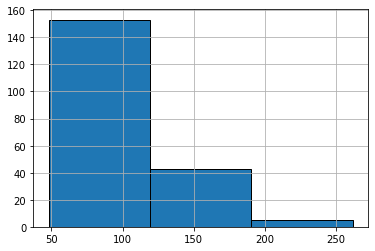

In [65]:
df['horsepower'].hist(bins=3, edgecolor='k')

<p>Gostaríamos de 3 compartimentos de largura de banda de tamanho igual, então usamos a função <code>linspace(start_value, end_value, numbers_generated</code> do numpy.</p>
<p>Como queremos incluir o valor mínimo de potência, queremos definir start_value = min(df["horsepower"]).</p>

<p>Como queremos incluir o valor máximo de potência, queremos definir end_value = max(df["horsepower"]).</p>
<p>Como estamos construindo 3 compartimentos de tamanho igual, deve haver 4 divisores, então number_generated = 4.</p>


Construímos uma matriz bin com um valor mínimo a um valor máximo usando a largura de banda calculada acima. Os valores determinarão quando um bin termina e outro começa.

In [66]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [67]:
group_names = ['Low', 'Medium', 'High']

Aplicamos a função "cut" para determinar a que cada valor de `df['horsepower']` pertence.

In [68]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )

In [69]:
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


Vamos ver o número de veículos em cada caixa:

In [70]:
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

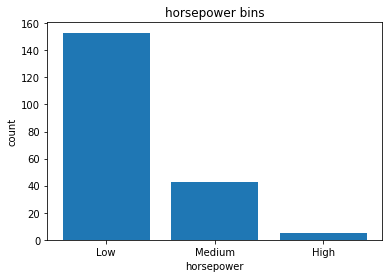

In [71]:
import matplotlib.pyplot as plt

plt.bar(group_names, df["horsepower-binned"].value_counts())

plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

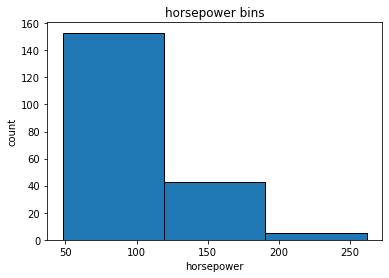

In [72]:
# plotar um histograma para "horsepower" com bins = 3
plt.hist(df["horsepower"], bins = 3, edgecolor='k')

# colocar os rótulos e o título
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

<h2 id="indicator">Variável indicadora (dummy, ou variável fictícia)</h2>
<b>O que é uma variável indicadora?</b>
<p>
     Uma variável indicadora (ou variável fictícia) é uma variável numérica usada para rotular categorias. Eles são chamados de 'dummies' porque os próprios números não têm significado inerente.
</p>

<b>Por que usamos variáveis indicadoras?</b>

<p>
     Usamos variáveis indicadoras para que possamos usar variáveis categóricas para análise de regressão nos módulos posteriores.
</p>

<b>Exemplo</b>
<p>
     Vemos que a coluna "tipo de combustível" tem dois valores únicos: "gás" ou "diesel". A regressão não entende palavras, apenas números. Para usar esse atributo na análise de regressão, convertemos "tipo combustível" em variáveis indicadoras.
</p>

<p>
     Usaremos o método 'get_dummies' dos pandas para atribuir valores numéricos a diferentes categorias de tipo de combustível.
</p>

In [73]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


Altere os nomes das colunas para maior clareza:

In [74]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [75]:
# mescla o quadro de dados "df" e "dummy_variable_1"
df = pd.concat([df, dummy_variable_1], axis=1)

# remove a coluna original "fuel-type" de "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [76]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,27,13495.0,11.190476,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,27,16500.0,11.190476,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,30,13950.0,9.791667,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,22,17450.0,13.055556,Low,0,1


In [77]:
# Salve o novo csv:
df.to_csv('clean_df.csv')